In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import networkx as nx
import random as RD
import pylab as PL
import numpy as np 
k = 4
%matplotlib inline

In [23]:
#init function for the start of simulation
def init():
    global g,positions,I,S,T,K,Iall,Sall,Tall,Kall,t,posters
    g=nx.read_edgelist('facebook_combined.txt',nodetype=int)
    
    for nd in g.nodes_iter():
        
        
        if RD.random() <= 0.05:
            g.node[nd]['state'] = 1
        else :
            g.node[nd]['state'] = 0
    positions=nx.spring_layout(g)
    I=0
    S=0
    T=0
    K=0
    t=[]
    Iall=[]
    Sall=[]
    Tall=[]
    Kall=[]
    for nd in g.nodes_iter():
        if g.node[nd]['state']==0:
            I=I+1
        if g.node[nd]['state']==1:
            S=S+1
    Iall.append(I)
    Sall.append(S)
    Tall.append(T)
    Kall.append(K)
    t.append(0)
    
    

In [24]:
#init function to assign daily login time and posting order
def dailyinit(day):
    global g,positions,I,S,T,K,Iall,Sall,Tall,Kall,t,posters
    for nd in g.nodes_iter():
        mu, sigma = 23, 4
        c=RD.randint(0,457)
        s = np.random.normal(mu, sigma)
        g.node[nd]['start']=480*day+c
        g.node[nd]['end']=480*day+int(c+s)
        if RD.random() <= 14.00/365:
            g.node[nd]['poster'] = 1
            g.node[nd]['post_time'] = 480*day+RD.randint(c,int(c+s))
        else :
            g.node[nd]['poster'] = 0
            g.node[nd]['post_time'] = -1
    a=sorted(g.nodes(data=True), key=lambda x: x[1]['post_time'])
    posters=[]
    for row in a:
        if (row[1]['post_time']>=0):
            posters.append(row[0])
            print(row[0],row[1]['post_time'])

In [25]:
#For plotting with Pycx
def draw():
    PL.cla()
    nx.draw(g, with_labels = False, pos = positions,
            node_color = [g.node[n]['state'] for n in g.nodes_iter()],
            vmin = 0, vmax = k - 1, cmap = PL.cm.jet)

In [26]:
def update(poster):
    global g, t,I,S,T,K,Iall,Sall,Tall,Kall
    prob=np.array([[-1,0.8,-1,-1],[-1,0.01,0.02,-1],[-1,-1,-1,-1],[-1,0.01,-1,-1]]) #probability table
    prob=np.transpose(prob)
    nd= poster #using poster as current node
    
    for a in range(1):
        
            
        for nd2 in g.neighbors(nd): #all neighbors of poster
            #print('--nd2='+str(nd2),g.node[nd2]['end'])
            if g.node[nd2]['end']>=g.node[nd]['post_time']: #neighbors which logout after posting time i.e those who can read the post
                #print('nd2='+str(nd2),g.node[nd2]['end'])
                
                i=g.node[nd]['state']
                j=g.node[nd2]['state']
                if prob[i,j]<0 : #Means this interaction is not important
                    print("no")
                    break
                else:
                    print("yes")
                    if j==0:  # if reader is ignorant
                        
                        if RD.random()<=0.8:
                            g.node[nd]['state']=1                            
                            S=S+1
                            I=I-1
                        else:
                            g.node[nd]['state']=2
                            I=I-1
                            T=T+1
                    if j==1:
                        
                        if RD.random()<=1/22*480:  #forgetting factor
                            g.node[nd]['state']=3
                            S=S-1
                            K=K+1
                            break
                        if RD.random()<=prob[i,j]:  #If reader is a spreader, poster can be spreader or Stifler
                            g.node[nd]['state']=2
                            S=S-1
                            T=T+1
                    if j==3:  #If reader is knowledgable
                        
                        if RD.random()<=prob[i,j]:
                            K=K-1
                            g.node[nd]['state']=2
                            T=T+1
                    
                    t.append(g.node[nd]['post_time'])
                    Iall.append(I)
                    Sall.append(S)
                    Tall.append(T)
                    Kall.append(K)

                    
            else:
                break

In [ ]:
#Simulation
init()
for day in range(0,22):
    dailyinit(day)
    for poster in posters:
        print(poster,g.node[poster]['post_time'])
        update(poster)
    


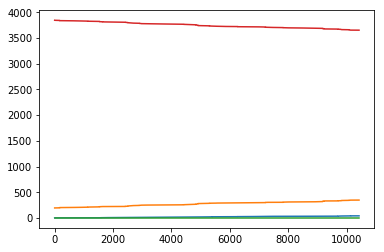

In [28]:
plt.plot(t,Tall) #Stifler
plt.plot(t,Sall) #Spreader
plt.plot(t,Kall) #Knowledgable
plt.plot(t,Iall) #Ignorant